In [4]:
import numpy as np
from typing import DefaultDict
import matplotlib.pyplot as plt
import re

In [3]:
fl = open("text.txt")
fl = fl.read()

In [12]:
text = fl
text_2gram = DefaultDict(lambda: 0)
for i in range(1, len(text)):
  text_2gram[fl[i-1:i+1]] += 1
cnt = 0
for i in sorted(text_2gram, key=text_2gram.get, reverse=True):
  cnt += 1
  print(repr(i), ": ", text_2gram[i], sep="")
  if cnt == 5:
    break

'  ': 36586
'\n ': 10259
', ': 10206
'о ': 8748
' п': 7900


In [13]:
# coding: utf-8

def make_Ngram(a):
 separator=''
 aa=list()
 for i in a:
  aa.append(i[:2])
 idx=separator.join(aa)
 return idx.lower()

f=open('text.txt',encoding='utf-8')
l=f.read()
#убрать пробелы

#разбить на элементы
l=re.sub('\s+',' ',l)

pattern=re.compile(r'(.)')
match=pattern.findall(l)

token_history=['','']
token_dict=dict()

sum_dict=0
for w in match:
 if(not w in ['.',',',':','-','?','!']):
  idx=make_Ngram(token_history)
  if(idx in token_dict):
   token_dict[idx]+=1
  else:
   token_dict[idx]=1
  token_history.pop(0)
  token_history.append(w)
  sum_dict+=1
token2idx=dict()
i=1
MIN_FREQ=0
for elem in sorted(token_dict.items(),reverse=True, key=lambda x: x[1] ):
 if(token_dict[elem[0]]>MIN_FREQ):
  token2idx[elem[0]]=i
  i+=1
max_elem=i


#init embeddings matrix
token_distrib=np.zeros([max_elem,max_elem])

#generate embeddings matrix for distributive semantics
context_history=['','','','','']
for w in match:
 if(not w in ['.',',',':','-','?','!']):
  idx=make_Ngram(token_history)
  token_history.pop(0)
  token_history.append(w)
  context_history.pop(0)
  context_history.append(idx)
  for idx2 in context_history:
   nidx=make_Ngram([idx2])

   if (idx!=idx2) and (idx in token2idx) and (idx2 in token2idx):
    token_distrib[token2idx[idx]][token2idx[idx2]]+=1
#and normalize it
for idx in range(max_elem):
 a=token_distrib[idx]
 a/=a.sum()+1e-100
#smooth frequency values
 token_distrib[idx]=np.log(a+1)


for elem in sorted(token2idx.items(), key=lambda x: x[1]):
  print(elem[0],':',elem[1],' f: ',token_distrib[token2idx[elem[0]]])

print(token_distrib.shape)

о  : 1  f:  [0.         0.         0.01359934 ... 0.         0.         0.        ]
и  : 2  f:  [0.         0.01419258 0.         ... 0.         0.         0.        ]
е  : 3  f:  [0.         0.01574398 0.01063425 ... 0.         0.         0.        ]
 п : 4  f:  [0.00000000e+00 3.96046555e-02 3.97987899e-02 ... 0.00000000e+00
 0.00000000e+00 2.88562813e-05]
 с : 5  f:  [0.         0.03764079 0.03772902 ... 0.         0.         0.        ]
 н : 6  f:  [0.         0.04076082 0.03589492 ... 0.         0.         0.        ]
 в : 7  f:  [0.         0.04228933 0.03912977 ... 0.         0.         0.        ]
ст : 8  f:  [0.         0.01547876 0.01218666 ... 0.         0.         0.        ]
то : 9  f:  [0.         0.02897895 0.02309343 ... 0.         0.         0.        ]
а  : 10  f:  [0.         0.00835943 0.01200834 ... 0.         0.         0.        ]
но : 11  f:  [0.         0.00990506 0.01038573 ... 0.         0.         0.        ]
 и : 12  f:  [0.         0.02969834 0.02921984 ..

# **NMF**

In [14]:
from sklearn.decomposition import NMF

In [17]:
nmf = NMF(n_components=10)
W=nmf.fit_transform(token_distrib)
H=nmf.components_
print(W)
print(H)

token_embed = W
for i, elem in enumerate(sorted(token2idx.items(), key=lambda x:x[1])):
  if i<10:
    print(elem[0],': ',elem[1],' embed: ',token_embed[token2idx[elem[0]]], sep='')

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.50071241e-02 6.51397201e-05 1.27240239e-05 ... 2.75759864e-04
  1.16517822e-02 5.03246867e-03]
 [3.15071535e-02 0.00000000e+00 1.51586999e-03 ... 2.81149706e-03
  5.14072594e-03 4.30163458e-03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.11377565e-02
  5.03993211e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.66778015e-02
  5.40394011e-04 0.00000000e+00]
 [3.08246903e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  4.58362039e-03 0.00000000e+00]]
[[0.00000000e+00 3.13309967e-01 4.15964962e-01 ... 0.00000000e+00
  1.43483344e-04 2.93522533e-04]
 [0.00000000e+00 1.32228174e-02 4.52494150e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.78894297e-03 2.59494549e-02 ... 0.00000000e+00
  8.32532913e-06 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 7.41754227e-03 ... 7.53711212e-03
  0.00000000e+00 0.00000000e+00]

In [18]:
print(token_embed[token2idx['и ']])

[0.03150715 0.         0.00151587 0.00455335 0.00277388 0.
 0.00167035 0.0028115  0.00514073 0.00430163]


In [26]:
print(repr(list(token2idx.keys())[list(token2idx.values()).index(2)]))

'и '


In [42]:
diff = 0.015
to_check = token_embed[token2idx['и ']]
cnt = 0
for i in token_embed:
  chk = True
  curr_diff = 0.
  for j in range(len(i)):
    curr_diff += abs(i[j]-to_check[j])
    #if (i[j]<to_check[j]-diff) or (i[j]>to_check[j]+diff):
    #  chk = False
  if curr_diff > diff:
    chk = False
  if chk:
    print(cnt, '\t', repr(list(token2idx.keys())[list(token2idx.values()).index(cnt)]), '\t', curr_diff, sep='')
    print(token_embed[cnt])
    print()
  cnt += 1

2	'и '	0.0
[0.03150715 0.         0.00151587 0.00455335 0.00277388 0.
 0.00167035 0.0028115  0.00514073 0.00430163]

10	'а '	0.010764846153252093
[0.03215757 0.         0.00054112 0.00105427 0.0014658  0.
 0.         0.0029624  0.0045611  0.00237001]

25	'ал'	0.014306050743809268
[0.02969378 0.         0.00057205 0.         0.00196076 0.
 0.         0.00221601 0.00753406 0.00277842]

75	'л '	0.013983389991996007
[0.02926226 0.         0.         0.00437499 0.00192119 0.
 0.         0.00135974 0.00321782 0.00015507]

121	'ик'	0.012794005679091724
[0.03401699 0.         0.00029716 0.00194466 0.0019708  0.
 0.         0.         0.00458821 0.00492096]

281	'нс'	0.012970670544448221
[0.03251304 0.         0.         0.         0.00425041 0.
 0.         0.00387855 0.00379463 0.00463719]

395	'рю'	0.009739886807103876
[0.02999734 0.00038947 0.0017082  0.00280548 0.00162555 0.
 0.00248097 0.00464276 0.00563264 0.0059199 ]



In [45]:
u, s, vh = np.linalg.svd(token_distrib)
print("shapes:", u.shape, s.shape, vh.shape)
d=u[:][s>0.00001]
print(d.shape)
token_embed=d.T
print('embed shape:', token_embed.shape)
min_w=1000
min_w_token=''
for elem in sorted(token2idx.items(), key=lambda x:x[1]):
  print(elem[0],': ',elem[1],' embed: ',token_embed[token2idx[elem[0]]], sep='')

shapes: (1615, 1615) (1615,) (1615, 1615)
(1590, 1615)
embed shape: (1615, 1590)
о : 1 embed: [0.         0.01505576 0.01283095 ... 0.02540714 0.00069562 0.00116693]
и : 2 embed: [ 0.          0.01025548  0.005589   ... -0.03822564 -0.00353172
 -0.01109715]
е : 3 embed: [ 0.          0.00737193  0.00322755 ... -0.1206318  -0.00791708
 -0.01224385]
 п: 4 embed: [ 0.         -0.00430026 -0.00584345 ... -0.01896618 -0.00814675
 -0.0300294 ]
 с: 5 embed: [ 0.          0.00078735  0.00171974 ...  0.02875531 -0.03948888
 -0.14258652]
 н: 6 embed: [ 0.         -0.00190949 -0.00095937 ...  0.04350713  0.00175812
  0.00645997]
 в: 7 embed: [ 0.          0.00436041  0.0068445  ... -0.02233643  0.00156086
  0.00552177]
ст: 8 embed: [ 0.          0.00051056  0.00432093 ... -0.00894529 -0.00130404
 -0.00216741]
то: 9 embed: [ 0.          0.01199042  0.01079098 ...  0.02200432  0.0005627
 -0.00031791]
а : 10 embed: [ 0.         -0.01970996 -0.00807874 ...  0.00462618 -0.0032882
 -0.00907066]
но: 11 

In [50]:
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
LineSentence("text.txt")

In [51]:
model = Word2Vec(LineSentence("text.txt"), size=200, window=5, min_count=3, workers=8)
model.init_sims(replace=True)

In [53]:
for i in model.wv.vocab:
  print(i)

Е.
Салтыков-Щедрин
*
одного
подлинным
Салтыков
в
двадцати
8.
и
История
города
уже
имел
я
намерение
написать
историю
какого-нибудь
(или
период
времени,
но
разные
обстоятельства
этому
же
недостаток
глуповском
городском
случайно
на
довольно
общее
название
"Глуповского
и,
их,
нашел,
что
они
могут
служить
деле
моего
"Летописца"
оно
почти
исключительно
градоначальников,
течение
целого
столетия
Глупова,
замечательнейших
их
действий,
как-то:
взыскания
против
обывателей,
устройства
данями
т.
д.
Тем
не
менее
даже
по
этим
оказывается
возможным
физиономию
как
его
истории
разнообразные
перемены,
одновременно
происходившие
высших
Так,
например,
градоначальники
времен
отличаются
--
а
Все
секут
первые
причины
своей
распорядительности
цивилизации,
третьи
чтоб
обыватели
во
всем
разнообразие
мероприятий,
конечно,
могло
самый
первом
случае,
трепетали
втором
с
собственной
до
Даже
та
неизбежно
должна
была
известную
долю
дух
преемственно
времени
1825
В
этом
году,
по-видимому,
для
архивариусов
деятельность
пе

In [54]:
print(model.wv['и'])

[ 4.41718996e-02  7.31768906e-02  1.10620737e-01  3.08875199e-02
  7.42792562e-02  6.88006207e-02 -3.55691044e-03  3.53451408e-02
  3.04224789e-02  1.45455062e-01 -9.57907438e-02  6.90585896e-02
  3.93646806e-02 -2.78788954e-02 -1.96903661e-01  6.25598012e-03
 -4.31780294e-02 -1.36107028e-01  5.37587404e-02 -6.05447032e-02
  1.06915735e-01 -9.65929180e-02  1.86721161e-02 -5.03807180e-02
 -1.77097738e-01  9.39350799e-02  3.90362777e-02 -5.49946204e-02
  9.68821533e-03 -3.29669267e-02  1.96168683e-02 -1.28963860e-02
 -1.02959886e-01  2.61590015e-02  3.16243209e-02  5.92944399e-02
  7.26130679e-02  1.19528592e-01 -3.35818119e-02 -9.75487232e-02
  5.60774840e-02 -1.35714738e-02  3.64423096e-02 -7.55122229e-02
 -1.01550363e-01 -6.91107884e-02  1.37814675e-02 -1.64235160e-02
 -1.72202103e-02  3.30495425e-02  4.39575836e-02 -4.32372019e-02
  1.60138160e-02  1.85840040e-01  4.35461514e-02  1.14829484e-02
 -2.36959942e-02  1.37065068e-01 -2.88850069e-02 -7.17254952e-02
  3.59931141e-02  5.93154

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
x = []
y = []
cnt = 0
for i in model.wv.vocab:
  x.append(model.wv[i])
  y.append(cnt)
  cnt += 1

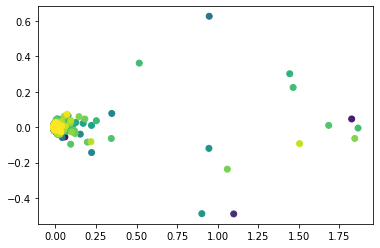

In [66]:
datas_pca = PCA()
datas_pca = datas_pca.fit_transform(x)
plt.scatter(datas_pca[:, 0], datas_pca[:, 1], c=y)
plt.show()

In [71]:
print(datas_pca.shape)

(4095, 200)


In [67]:
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


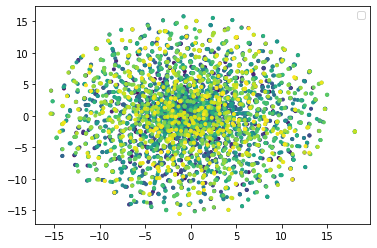

In [70]:
datas_tsne = TSNE(n_components=2)
datas_tsne = datas_tsne.fit_transform(x)
plt.scatter(datas_tsne[:, 0], datas_tsne[:, 1], marker='.', c=y)
plt.legend()
plt.show()

In [76]:
s2 = np.loadtxt("s2.dat")
s4 = np.loadtxt("s4.dat")

In [77]:
from sklearn.tree import DecisionTreeClassifier as DTC

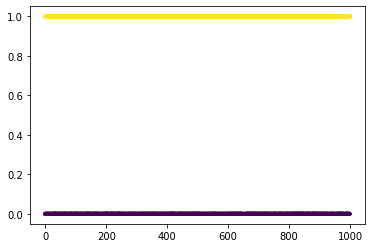

1.0


In [96]:
DTC2 = DTC()
x = []
for i in s2[:, 0]:
  x.append([i])
DTC2.fit(x, s2[:, 1])
res = DTC2.predict(x)
plt.scatter(x, res, marker='.', c=s2[:, 1])
plt.show()
print(DTC2.score(x, s2[:, 1]))

In [84]:
from sklearn.tree import export_graphviz
import graphviz

In [85]:
keke = export_graphviz(DTC2, out_file=None)
gr = graphviz.Source(keke)
gr.render("mytree")

'mytree.pdf'

In [94]:
from sklearn.neural_network import MLPClassifier as MPLC

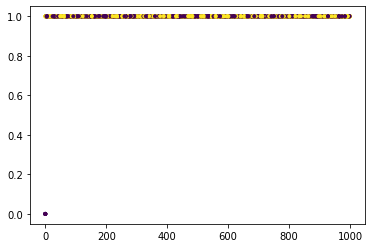

0.506


In [117]:
MPLC2 = MPLC(batch_size=200)
MPLC2.fit(x, s2[:, 1])
res = MPLC2.predict(x)
plt.scatter(x, res, marker='.', c=s2[:, 1])
plt.show()
print(MPLC2.score(x, s2[:, 1]))